# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [284]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [285]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Load the Data

In [227]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [46]:
print(f"df_data dataframe shape: {df_data.shape} ({df_data.shape[1]} columns and {df_data.shape[0]} rows).")
print(f"df_data dataframee columns names: {df_data.columns.tolist()}.")
df_data.sample(10)

df_data dataframe shape: (4324, 9) (9 columns and 4324 rows).
df_data dataframee columns names: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status'].


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3106,3106,3106,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Tue Oct 02, 1973 21:46 UTC",Cosmos-3M (11K65M) | Cosmos 588 to 595,StatusRetired,NaN,Success
3966,3966,3966,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA","Thu May 27, 1965 19:30 UTC",Atlas-SLV3 Agena-D | KH-7 Gambit 4018,StatusRetired,NaN,Success
102,102,102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.3,Success
387,387,387,CASC,"LC-3, Xichang Satellite Launch Center, China","Sat Dec 10, 2016 16:11 UTC",Long March 3B/E | Fengyun 4A,StatusActive,29.15,Success
1093,1093,1093,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Wed Jun 05, 2002 06:44 UTC",Ariane 44L | Intelsat 905,StatusRetired,NaN,Success
2687,2687,2687,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Wed Jul 13, 1977 05:02 UTC",Cosmos-3M (11K65M) | Cosmos 928,StatusRetired,NaN,Success
2114,2114,2114,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA","Wed Aug 28, 1985 21:20 UTC",Titan 34D | KH-11,StatusRetired,NaN,Failure
637,637,637,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu Aug 02, 2012 20:54 UTC","Ariane 5 ECA | Intelsat 20, HYLAS 2",StatusActive,200.0,Success
861,861,861,VKS RF,"Site 132/1, Plesetsk Cosmodrome, Russia","Mon Jul 02, 2007 19:38 UTC",Cosmos-3M (11K65M) | SAR-Lupe 2,StatusRetired,NaN,Success
732,732,732,Kosmotras,"Site 109/95, Baikonur Cosmodrome, Kazakhstan","Thu Apr 08, 2010 13:57 UTC",Dnepr | CryoSat-2,StatusRetired,29.0,Success


In [47]:
print(f'Number of missing values across columns:')
df_data.isna().sum()

Number of missing values across columns:


Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [48]:
print(f'Number of rows with duplicated data : {df_data.duplicated().sum()}')

Number of rows with duplicated data : 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [228]:
df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df_data.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1901,ISAS,"Mu Pad, Uchinoura Space Center, Japan","Tue Feb 21, 1989 23:30 UTC",Mu-III S2 | Akebono,StatusRetired,NaN,Success
3918,NASA,"LC-19, Cape Canaveral AFS, Florida, USA","Wed Dec 15, 1965 13:37 UTC",Titan II GLV | Gemini VI-A,StatusRetired,NaN,Success
3420,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Fri Oct 16, 1970 15:00 UTC",Cosmos-3M (11K65M) | Cosmos 372,StatusRetired,NaN,Success
181,CASC,"LC-2, Xichang Satellite Launch Center, China","Fri Dec 07, 2018 18:23 UTC",Long March 3B/E | Chang'e-4,StatusActive,29.15,Success
1895,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Fri Mar 24, 1989 13:38 UTC",Cosmos-3M (11K65M) | Cosmos 2008 to 2015,StatusRetired,NaN,Success
3045,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Apr 29, 1974 13:29 UTC",Voskhod | Cosmos 649,StatusRetired,NaN,Success
805,Kosmotras,"Site 109/95, Baikonur Cosmodrome, Kazakhstan","Fri Aug 29, 2008 07:15 UTC",Dnepr | RapidEye 1 to 5,StatusRetired,29.0,Success
1970,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Dec 15, 1987 13:30 UTC",Cosmos-3M (11K65M) | Cosmos 1902,StatusRetired,NaN,Success
538,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sun Sep 21, 2014 05:52 UTC",Falcon 9 v1.1 | CRS-4,StatusRetired,56.5,Success
2986,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Nov 16, 1974 11:45 UTC",Voskhod | Cosmos 694,StatusRetired,NaN,Success


## Descriptive Statistics

In [50]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [51]:
df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float).describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [59]:
df_launches_per_company = df_data["Organisation"].value_counts()
df_launches_per_company

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

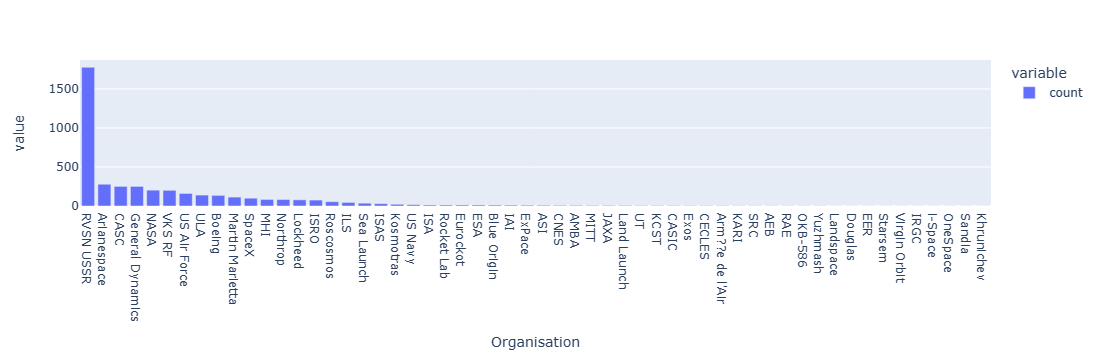

In [60]:
px.bar(df_launches_per_company)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [68]:
df_rocket_retirement = df_data["Rocket_Status"].value_counts()
df_rocket_retirement

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

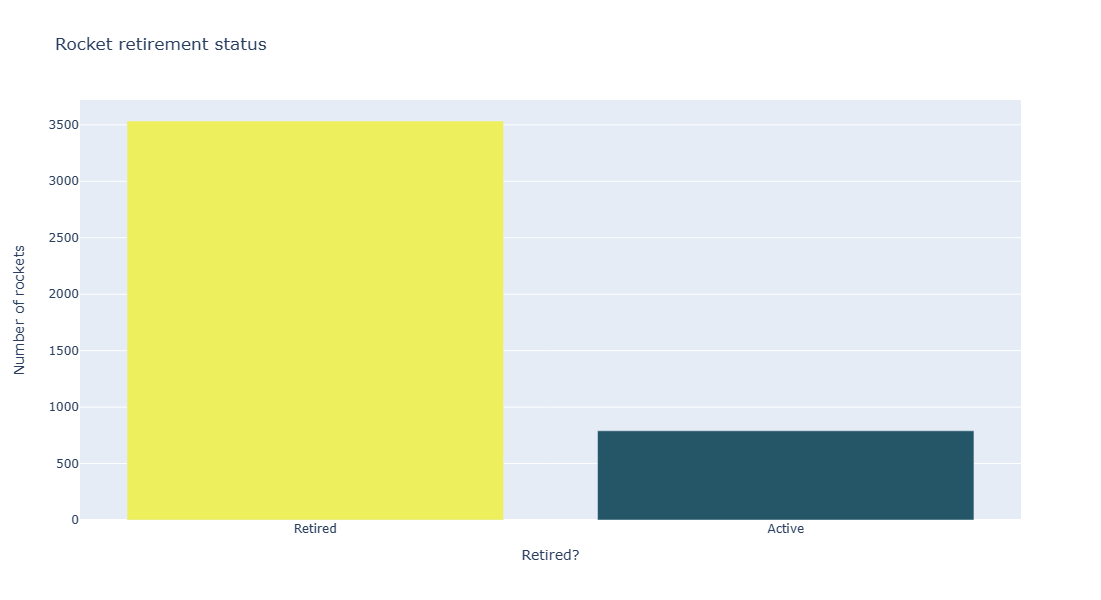

In [69]:
fig_bar = px.bar(df_rocket_retirement, x=['Retired', 'Active'], y=df_rocket_retirement.values, 
                 color=df_rocket_retirement.values, color_continuous_scale='Aggrnyl',
                 title='Rocket retirement status', height=600)

fig_bar.update_layout(xaxis_title='Retired?', coloraxis_showscale=False, yaxis_title='Number of rockets')

fig_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [70]:
df_mission_status = df_data["Mission_Status"].value_counts()
df_mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

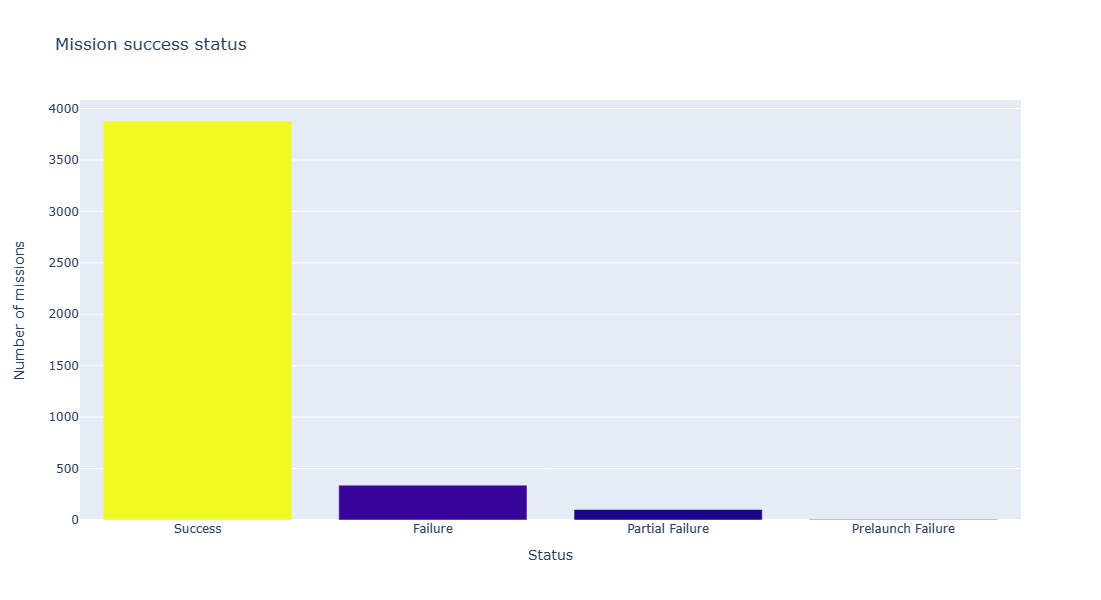

In [71]:
fig_bar = px.bar(df_mission_status, x=['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'], y=df_mission_status.values, 
                 color=df_mission_status.values,
                 title='Mission success status', height=600)

fig_bar.update_layout(xaxis_title='Status', coloraxis_showscale=False, yaxis_title='Number of missions')

fig_bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [72]:
df_mission_costs = df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float)
df_mission_costs

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: float64

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



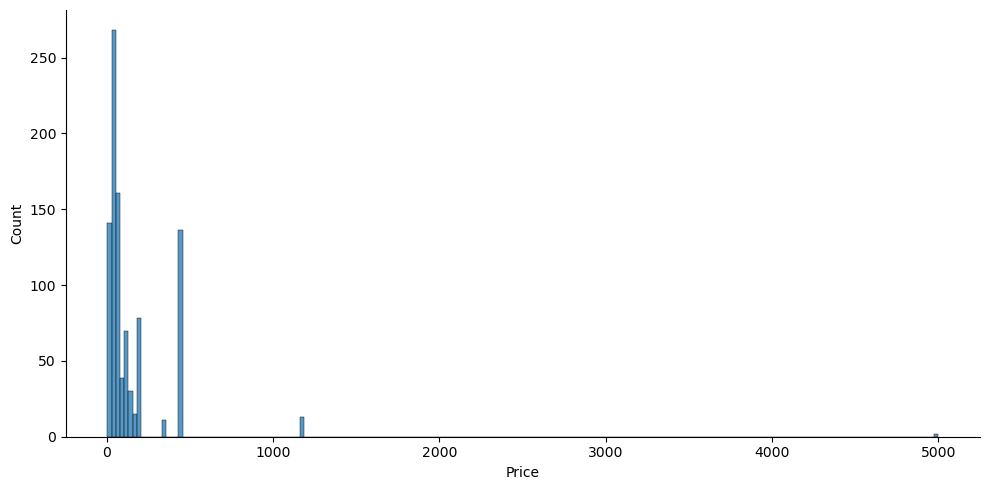

In [77]:
hist_plot = sns.displot(df_mission_costs, aspect=2)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [314]:
df_data["country"] = df_data["Location"].str.split(',').str[-1].str.strip()

df_data['country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    }, 
    inplace=True
)
df_data.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,country
1640,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",1993-04-01 18:57:00+00:00,Cosmos-3M (11K65M) | Cosmos 2239,StatusRetired,NaN,Success,1993,Russian Federation
3940,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1965-09-23 09:00:00+00:00,Voskhod | Cosmos 91,StatusRetired,NaN,Success,1965,Kazakhstan
4100,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1962-12-22 09:24:00+00:00,Vostok-2 | Cosmos 12,StatusRetired,NaN,Success,1962,Kazakhstan
2666,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1977-09-14 00:15:00+00:00,Feng Bao 1 | DDDS 1,StatusRetired,NaN,Success,1977,China
2818,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1976-05-21 07:00:00+00:00,Soyuz U | Cosmos 820,StatusRetired,NaN,Success,1976,Russian Federation
1477,CASC,"LC-2, Xichang Satellite Launch Center, China",1995-11-28 11:30:00+00:00,Long March 2E | AsiaSat 2,StatusRetired,NaN,Success,1995,China
902,ISAS,"Mu Pad, Uchinoura Space Center, Japan",2006-09-22 21:36:00+00:00,"Mu-V / M-25 | SSSat 2, Hinode & Camatai",StatusRetired,NaN,Success,2006,Japan
286,CASC,"LC-2, Xichang Satellite Launch Center, China",2018-01-11 23:18:00+00:00,Long March 3B/YZ-1 | BeiDou-3 M7 & M8,StatusActive,NaN,Success,2018,China
222,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA",2018-08-12 07:31:00+00:00,Delta IV Heavy | Parker Solar Probe,StatusActive,350.0,Success,2018,USA
2073,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1986-02-19 23:04:00+00:00,Tsyklon-3 | Cosmos 1733,StatusRetired,NaN,Success,1986,Russian Federation


In [315]:
df_data['ISO'] = df_data['country'].apply(lambda x: countries.get(x).alpha3)

df_data.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,country,ISO
415,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2016-08-24 22:16:00+00:00,"Ariane 5 ECA | Intelsat 33e, Intelsat 36",StatusActive,200.0,Success,2016,France,FRA
3027,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1974-06-26 12:30:00+00:00,Cosmos-2I (63SM) | Cosmos 662,StatusRetired,NaN,Success,1974,Russian Federation,RUS
150,CASC,"LC-2, Xichang Satellite Launch Center, China",2019-03-31 15:51:00+00:00,Long March 3B/E | Tianlian-2,StatusActive,29.15,Success,2019,China,CHN
2684,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1977-07-20 07:35:00+00:00,Soyuz U | Cosmos 932,StatusRetired,NaN,Success,1977,Kazakhstan,KAZ
2567,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1978-09-19 08:05:00+00:00,Soyuz U | Cosmos 1032,StatusRetired,NaN,Success,1978,Russian Federation,RUS
3668,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1968-05-07 13:57:00+00:00,Cosmos-3M (11K65M) | Cosmos 220,StatusRetired,NaN,Success,1968,Russian Federation,RUS
3706,RVSN USSR,"Site 86/1, Kapustin Yar, Russia",1967-12-26 09:01:00+00:00,Cosmos-2I (63SM) | Cosmos 197,StatusRetired,NaN,Success,1967,Russian Federation,RUS
310,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2017-10-30 19:34:00+00:00,Falcon 9 Block 4 | Koreasat 5A,StatusRetired,62.0,Success,2017,USA,USA
1011,ILS,"SLC-36A, Cape Canaveral AFS, Florida, USA",2004-02-05 23:46:00+00:00,Atlas IIAS | AMC-10,StatusRetired,NaN,Success,2004,USA,USA
1399,MITT,"Svobodny Cosmodrome, Russia",1997-03-04 02:00:00+00:00,Start-1 | Zeya,StatusActive,NaN,Success,1997,Russian Federation,RUS


# Use a Choropleth Map to Show the Number of Failures by Country


In [316]:
launches_per_country = df_data[df_data['Mission_Status']=='Failure'].groupby(['ISO', 'country'], as_index=False).agg({'Date': pd.Series.count})
launches_per_country.rename(columns={"Date": "launches"}, inplace=True)
launches_per_country

,ISO,country,launches
0,AUS,Australia,3
1,BRA,Brazil,2
2,CHN,China,19
3,FRA,France,13
4,IND,India,8
5,IRN,"Iran, Islamic Republic of",8
6,ISR,Israel,2
7,JPN,Japan,10
8,KAZ,Kazakhstan,72
9,KIR,Kiribati,3


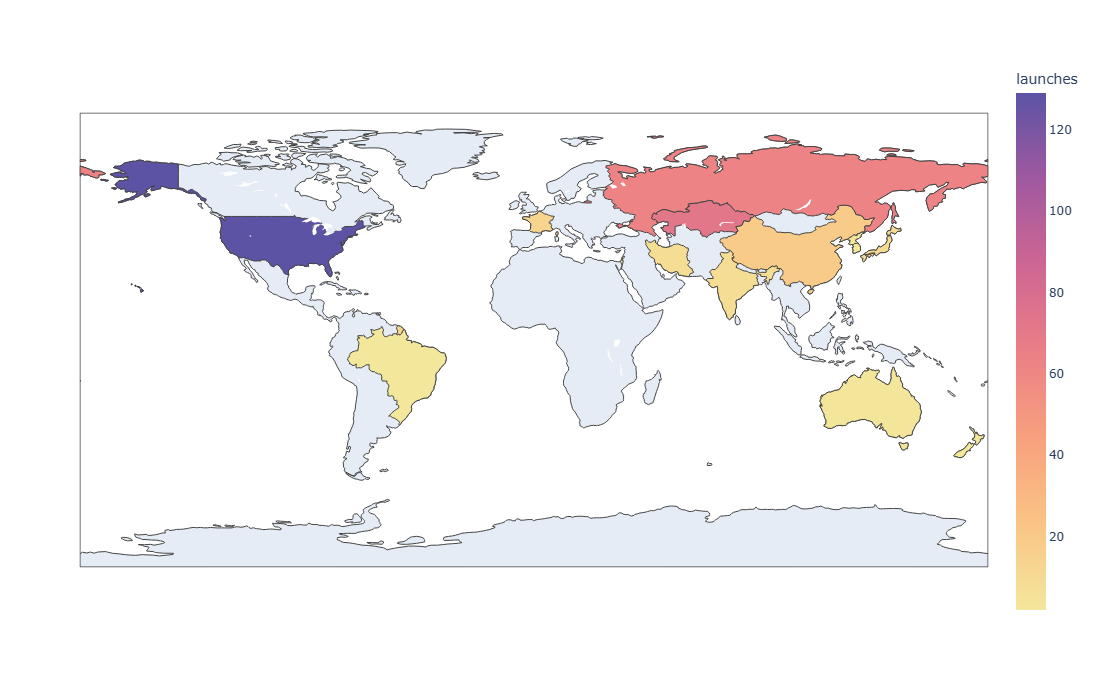

In [317]:
world_map = px.choropleth(launches_per_country, locations="ISO",
                    color="launches",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Sunset,
                    height=700)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [177]:
launches_per_organization = df_data.groupby(['Mission_Status','Organisation','country'], as_index=False).agg({'Date': pd.Series.count})
launches_per_organization.rename(columns={"Date": "launches"}, inplace=True)
launches_per_organization

,Mission_Status,Organisation,country,launches
0,Failure,AEB,Brazil,2
1,Failure,AMBA,USA,3
2,Failure,Arianespace,France,7
3,Failure,Boeing,USA,3
4,Failure,CASC,China,14
...,...,...,...,...
127,Success,VKS RF,Kazakhstan,41
128,Success,VKS RF,Russian Federation,147
129,Success,Yuzhmash,Kazakhstan,1
130,Success,Yuzhmash,Russian Federation,1


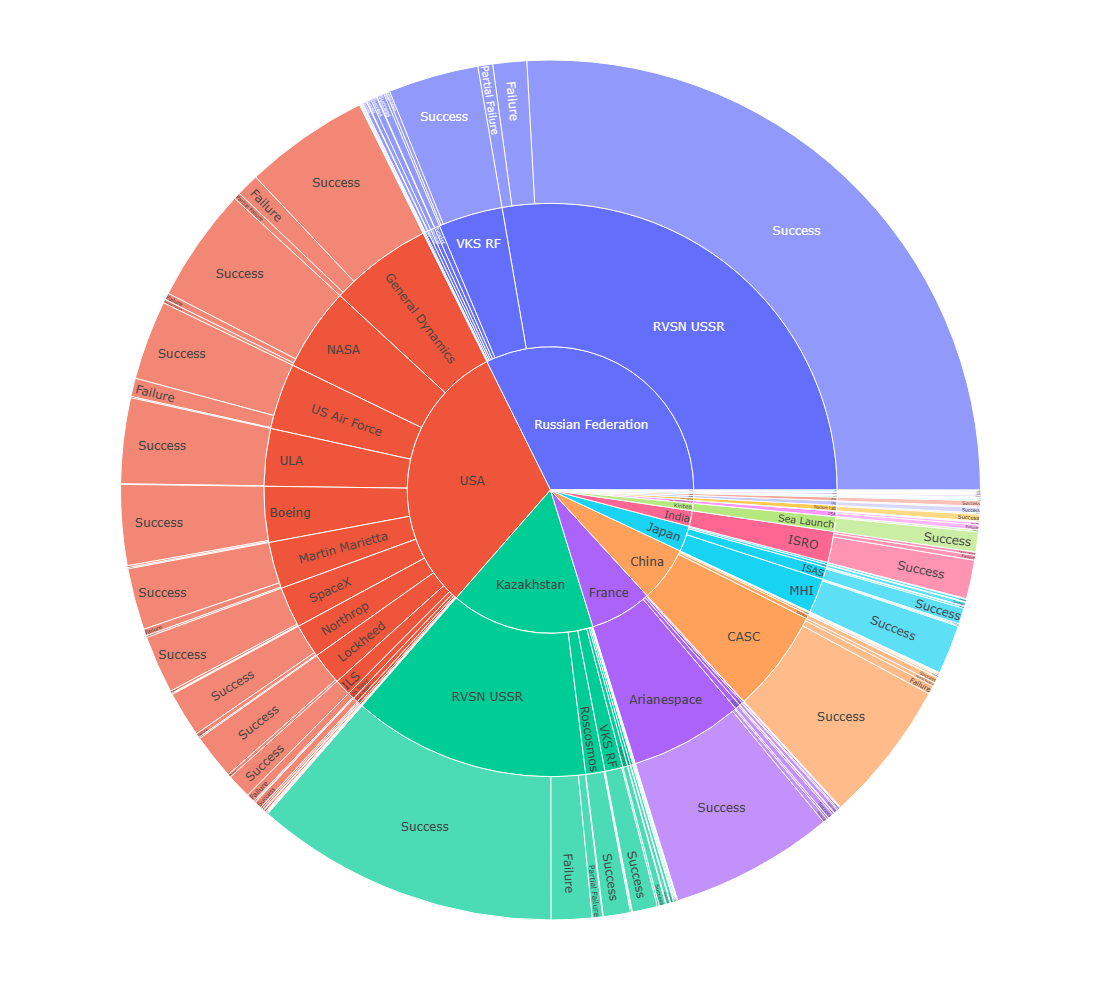

In [180]:
sun_org = px.sunburst(
    launches_per_organization,
    path=['country','Organisation','Mission_Status'],
    values='launches',
    height=1000
)
sun_org.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [195]:
total_spent_by_org = df_data.dropna()
total_spent_by_org["Price"] = total_spent_by_org["Price"].str.replace(',', '').astype(float)
total_spent_by_org = total_spent_by_org.groupby("Organisation")["Price"].sum()
total_spent_by_org

C:\Users\james\AppData\Local\Temp\ipykernel_21964\3640517696.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

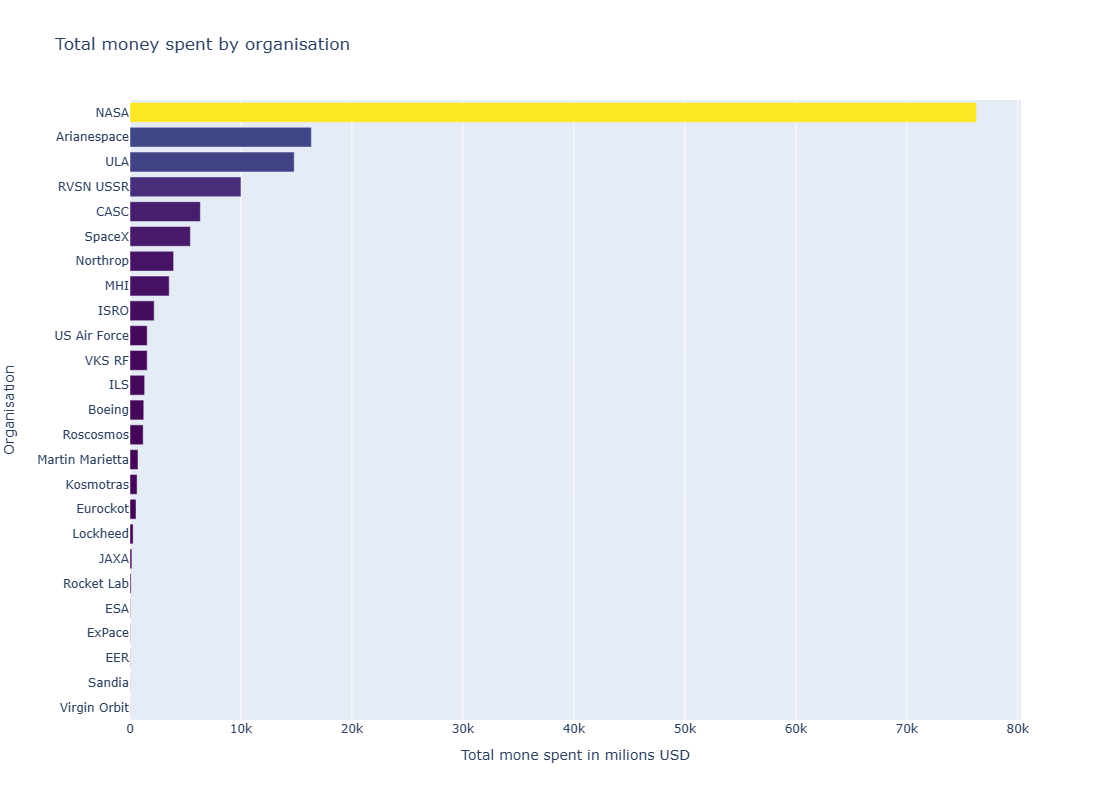

In [203]:
total_spent_by_org.sort_values(inplace=True)
h_bar_org = px.bar(
    total_spent_by_org, 
    x=total_spent_by_org.values, 
    y=total_spent_by_org.index, 
    orientation='h', 
    height=800,
    color=total_spent_by_org.values,
    color_continuous_scale='Viridis',
    title='Total money spent by organisation')

h_bar_org.update_layout(xaxis_title='Total mone spent in milions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)

h_bar_org.show()

# Analyse the Amount of Money Spent by Organisation per Launch

C:\Users\james\AppData\Local\Temp\ipykernel_21964\893329174.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



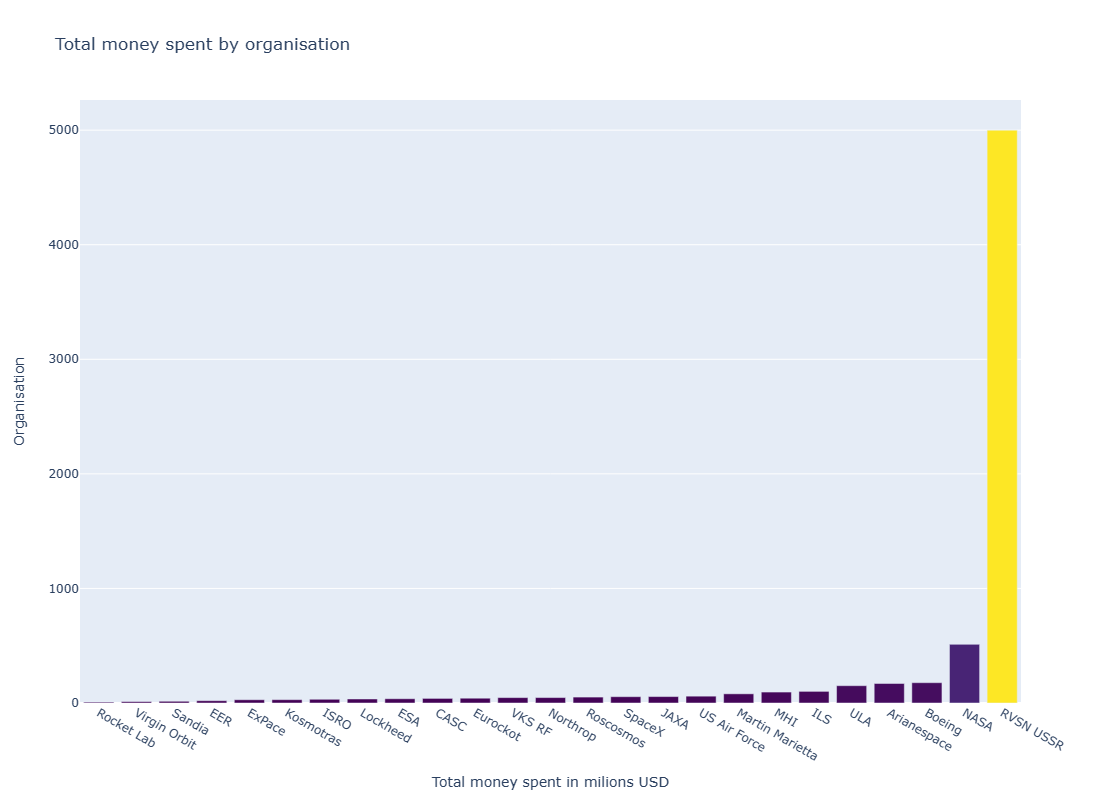

In [206]:
total_spent_by_org = df_data.dropna()
total_spent_by_org["Price"] = total_spent_by_org["Price"].str.replace(',', '').astype(float)
total_spent_by_org = total_spent_by_org.groupby("Organisation")["Price"].mean()

total_spent_by_org.sort_values(inplace=True)
bar_org = px.bar(
    total_spent_by_org, 
    x=total_spent_by_org.index, 
    y=total_spent_by_org.values,
    height=800,
    color=total_spent_by_org.values,
    color_continuous_scale='Viridis',
    title='Total money spent by organisation')

bar_org.update_layout(xaxis_title='Total money spent in milions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)

bar_org.show()

# Chart the Number of Launches per Year

In [245]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True, format='mixed', errors='coerce')
df_data['Year'] = df_data['Date'].dt.year
launches_per_year = df_data.groupby('Year')['Detail'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

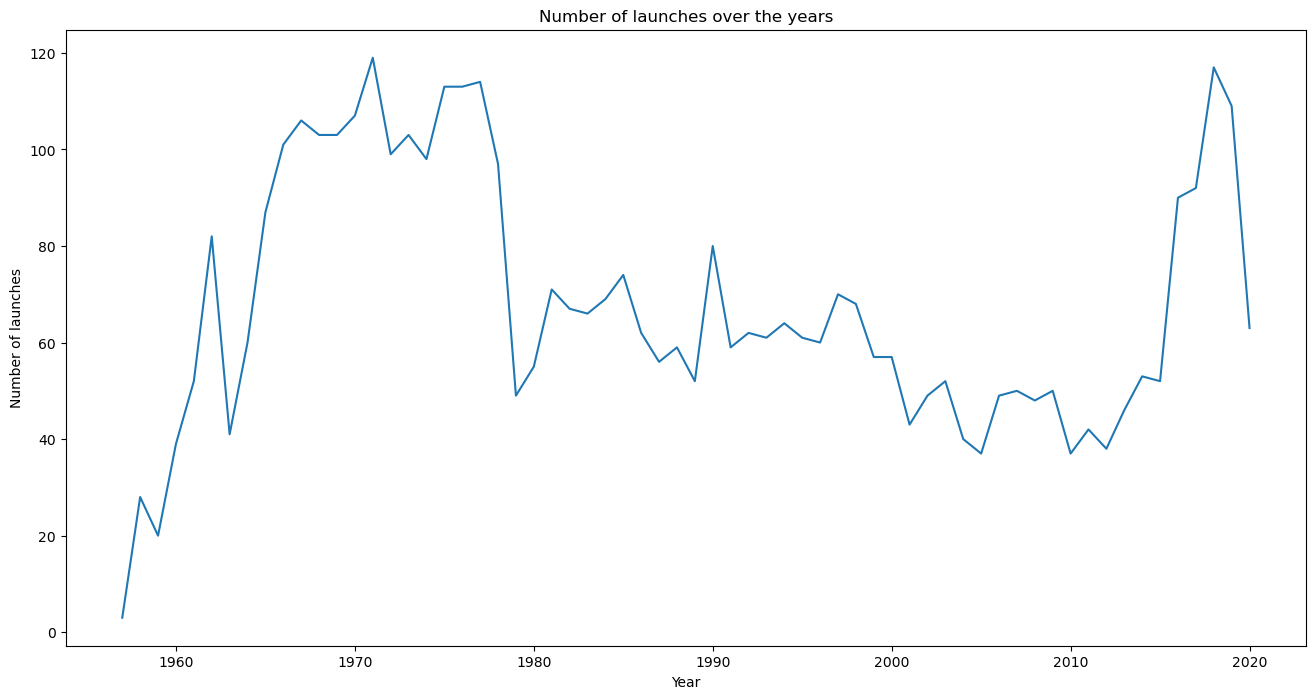

In [246]:
launches_per_year.plot(
    title='Number of launches over the years',
    figsize = (16,8)
)

plt.ylabel('Number of launches') 
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [277]:
df_reindexed = df_data.set_index('Date')

# Resample and sum by month
launches_m2m = df_reindexed.resample('M').count().Detail
roll_launches_m2m = launches_m2m.rolling(window=5).mean()
launches_m2m

Date
1957-10-31 00:00:00+00:00     1
1957-11-30 00:00:00+00:00     1
1957-12-31 00:00:00+00:00     1
1958-01-31 00:00:00+00:00     0
1958-02-28 00:00:00+00:00     2
                             ..
2020-04-30 00:00:00+00:00     5
2020-05-31 00:00:00+00:00     9
2020-06-30 00:00:00+00:00     7
2020-07-31 00:00:00+00:00    14
2020-08-31 00:00:00+00:00     3
Freq: M, Name: Detail, Length: 755, dtype: int64

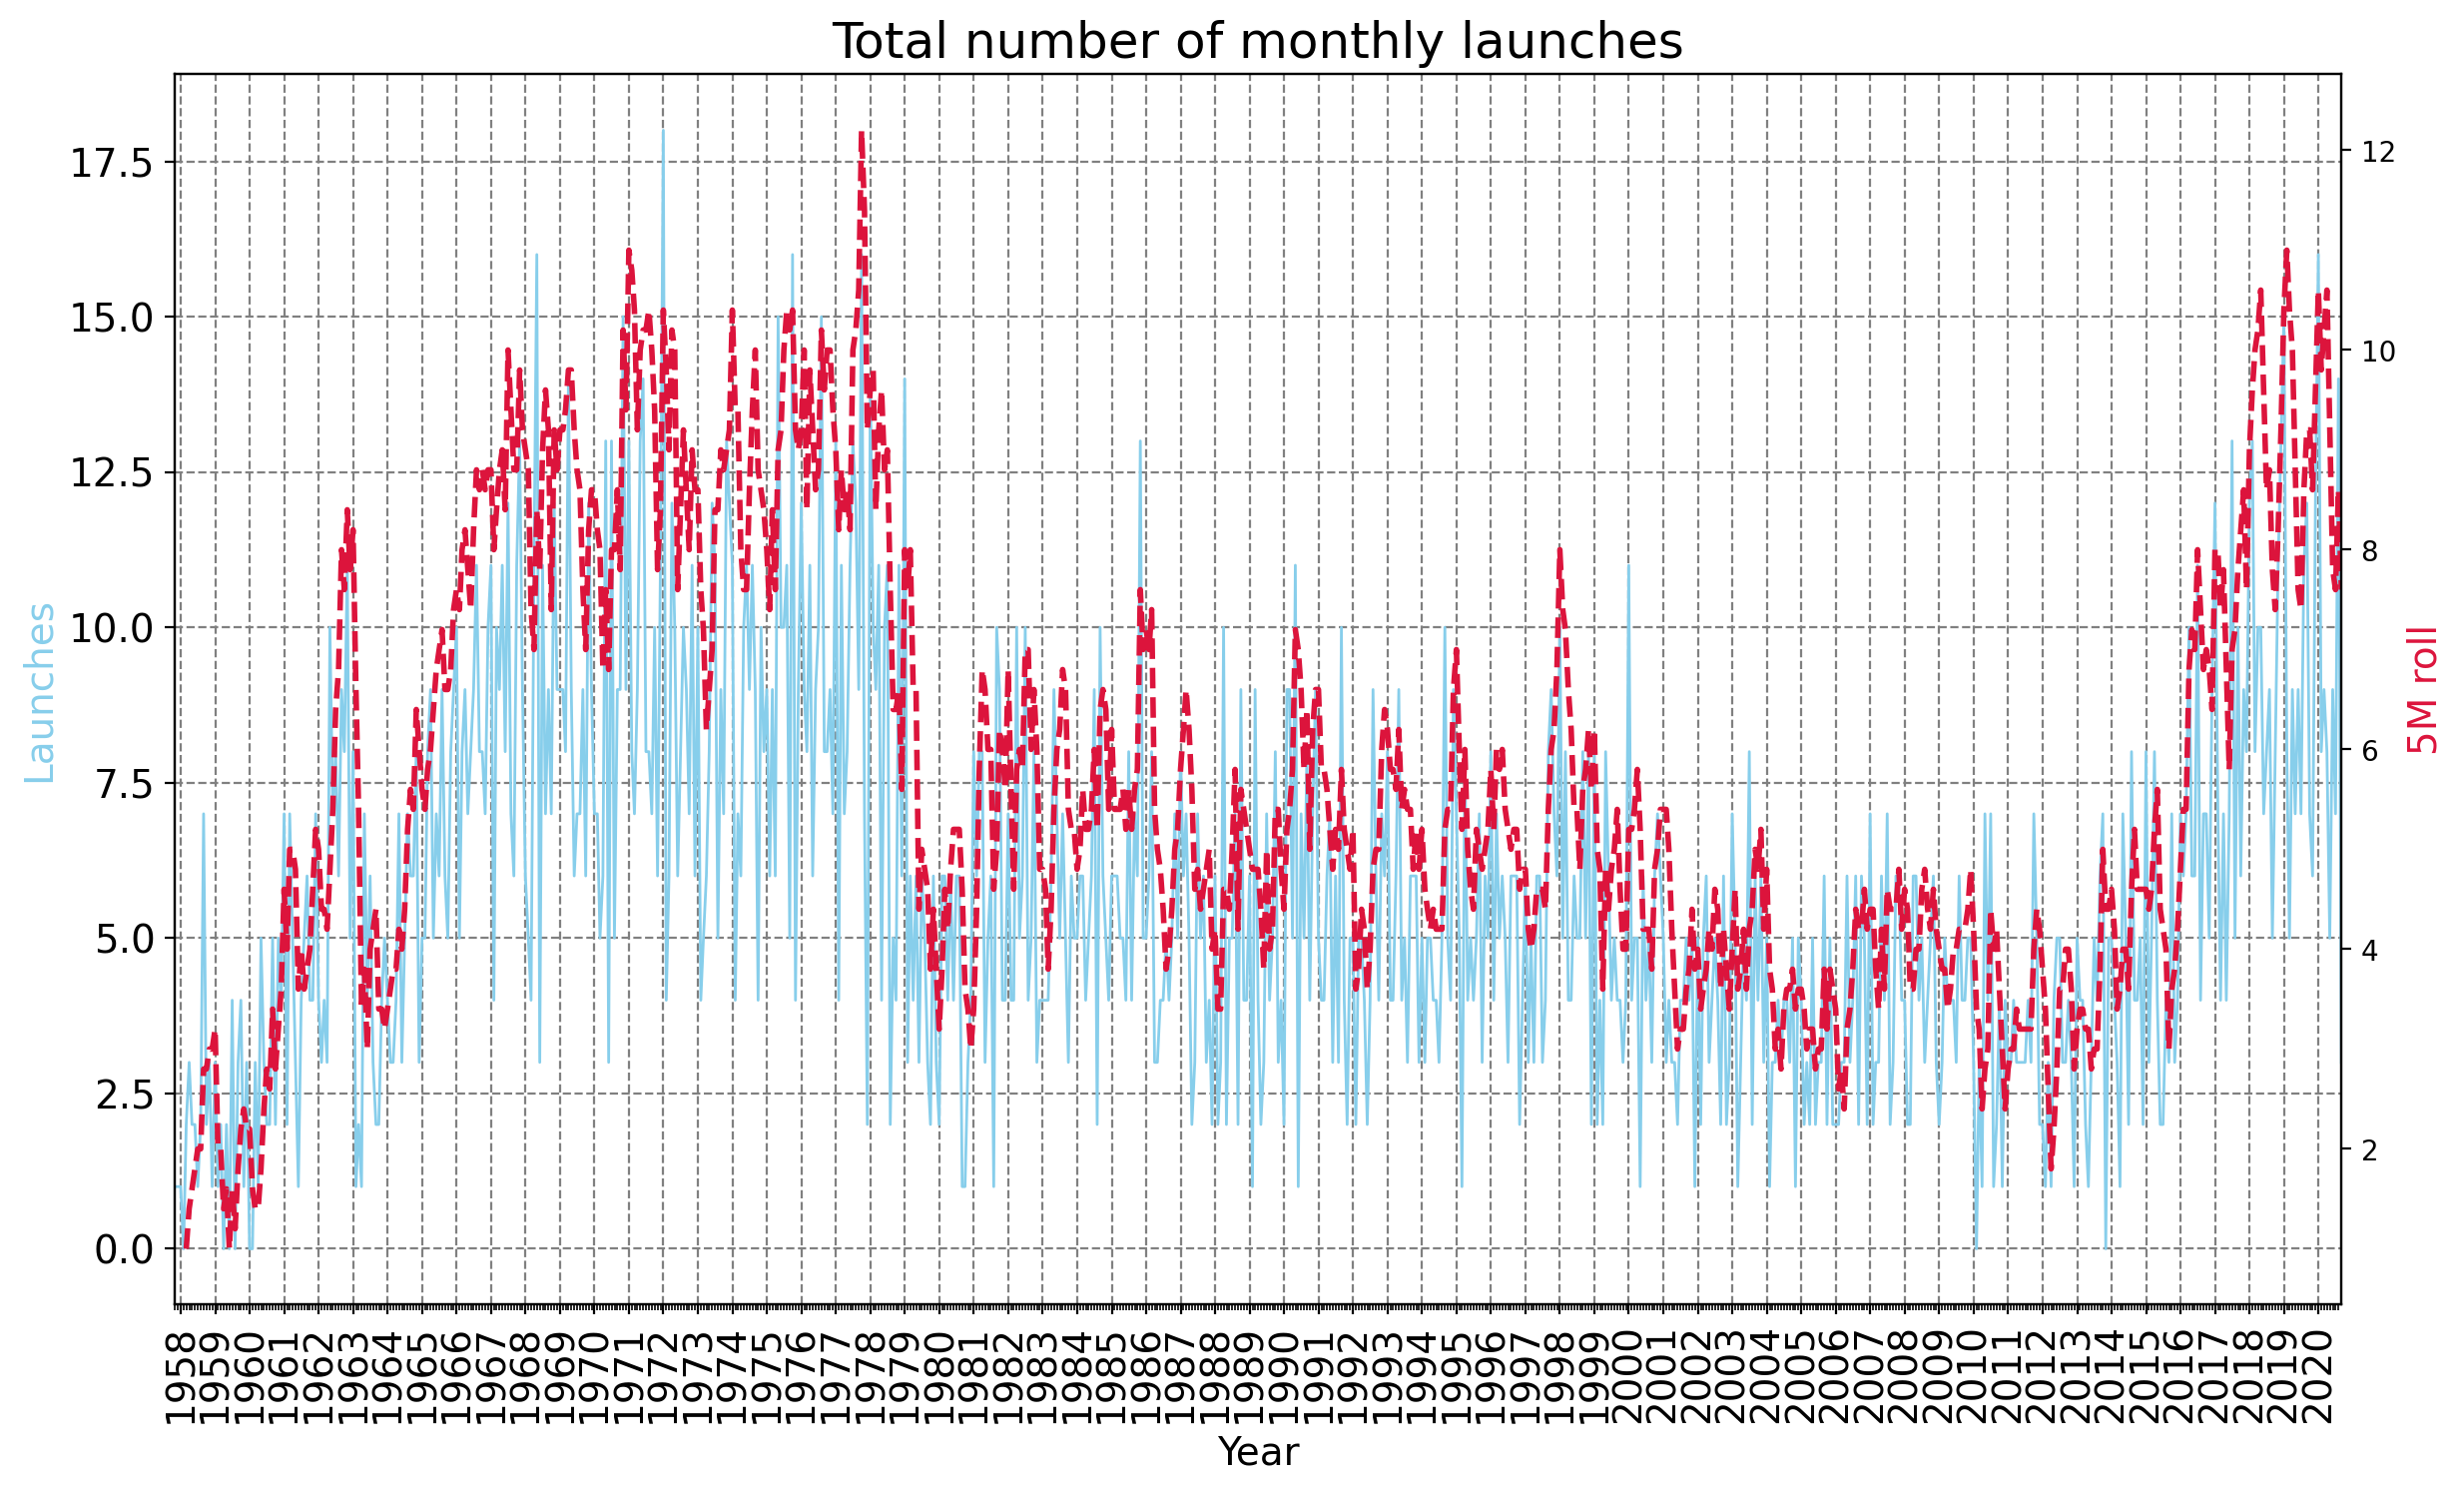

In [290]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total number of monthly launches', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx() 

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Launches', c='skyblue', fontsize=14)
ax2.set_ylabel('5M roll', c='crimson', fontsize=14)

ax1.set_xlim([launches_m2m.index.min(), launches_m2m.index.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(launches_m2m.index, launches_m2m.values, c='skyblue', linewidth=1)
ax2.plot(launches_m2m.index, roll_launches_m2m.values, '--', c='crimson', linewidth=2)

plt.show()

In [300]:
launches_m2m.idxmax()
print(f'Most lauches ({launches_m2m.values.max()}) took place on {launches_m2m.idxmax().month_name()} of {launches_m2m.idxmax().year}')

Most lauches (18) took place on December of 1971


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [253]:
launches_by_month = df_data['Date'].dt.month.value_counts().reset_index()
launches_by_month.columns = [
    'month', 
    'launches'
]
launches_by_month

,month,launches
0,12,450
1,6,402
2,4,383
3,10,381
4,8,373
5,9,365
6,3,353
7,7,351
8,2,336
9,11,336


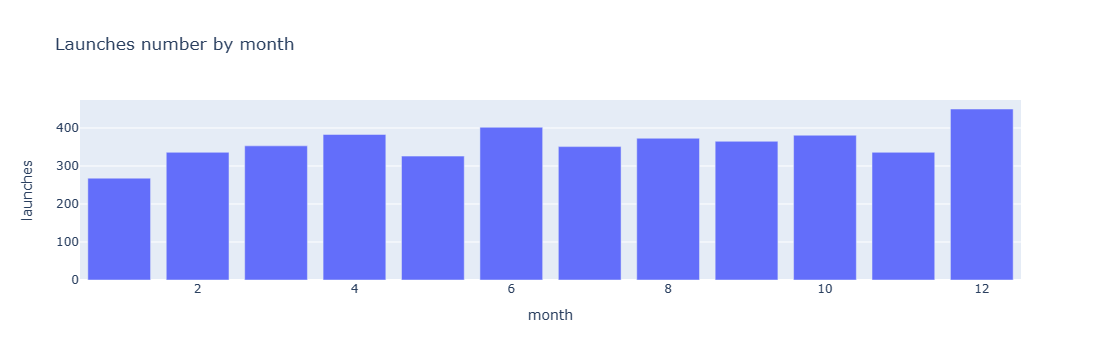

In [254]:
fig = px.bar(
    launches_by_month, 
    x='month', 
    y="launches", 
    orientation='v', 
    title='Launches number by month'
)
fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [303]:
launches_price_per_year = df_data.dropna()
launches_price_per_year["Price"] = launches_price_per_year["Price"].str.replace(',', '').astype(float)

launches_price_per_year = launches_price_per_year.groupby('Year')['Price'].mean()
launches_price_per_year

C:\Users\james\AppData\Local\Temp\ipykernel_21964\2323750239.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year
1964      63.23
1965      63.23
1966      59.00
1967     196.62
1968     279.20
1969     609.50
1970   1,160.00
1971   1,160.00
1972   1,160.00
1973   1,160.00
1981     450.00
1982     345.20
1983     366.16
1984     380.13
1985     408.08
1986     310.27
1987   1,687.20
1988   1,193.16
1989     380.83
1990     289.15
1991     391.43
1992     319.35
1993     276.73
1994     221.51
1995     325.00
1996     243.20
1997     221.74
1998     152.12
1999     128.51
2000     173.12
2001     290.70
2002     185.59
2003      80.51
2004      92.74
2005      95.79
2006     138.61
2007     125.70
2008     129.75
2009     180.29
2010     148.40
2011     146.60
2012     122.29
2013      90.55
2014     102.55
2015      91.55
2016      79.46
2017      69.49
2018      64.75
2019      59.61
2020      56.65
Name: Price, dtype: float64

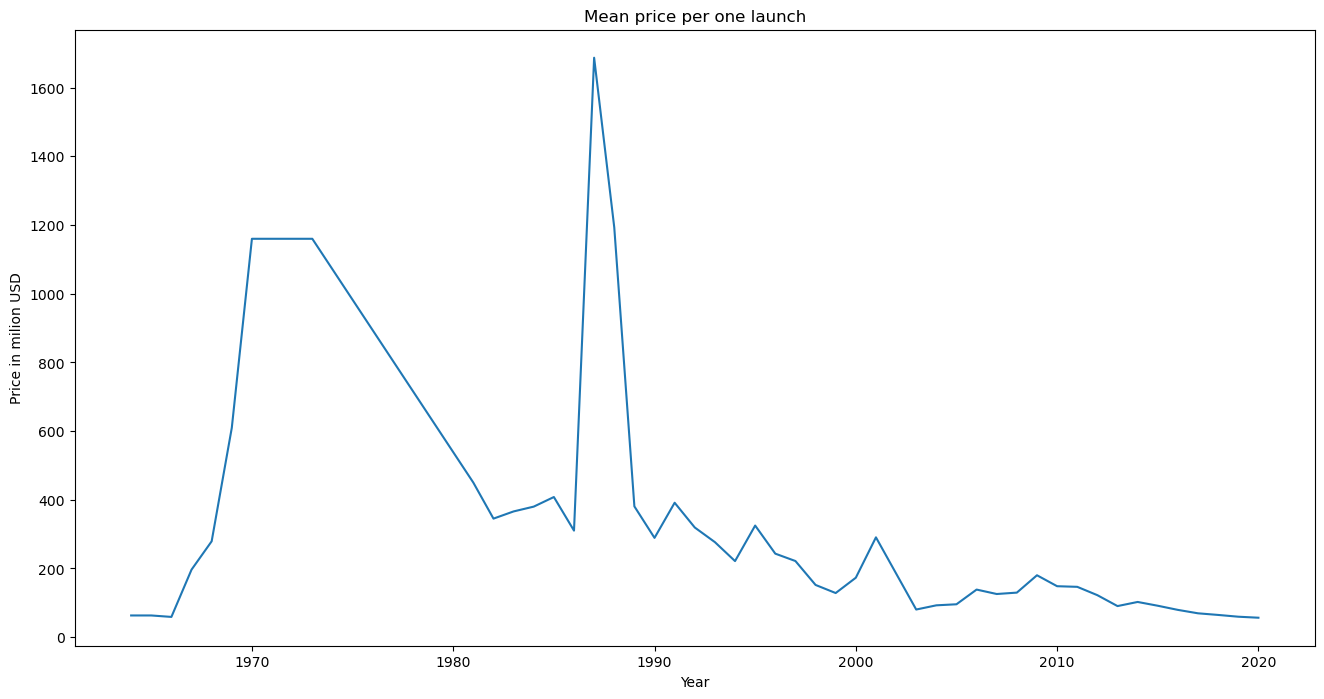

In [304]:
launches_price_per_year.plot(
    title='Mean price per one launch',
    figsize = (16,8)
)

plt.ylabel('Price in milion USD') 
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [385]:
org_counts = df_data.groupby("Organisation").size().reset_index(name="Count")
org_counts = org_counts.sort_values("Count", ascending=False)
top_10_orgs = org_counts.head(10)
top_10_orgs_df = df_data[df_data["Organisation"].isin(top_10_orgs["Organisation"])]
top_10_orgs_launches_per_years = top_10_orgs_df.groupby(['Year'], as_index=False).agg({'Detail': pd.Series.count})
top_10_orgs_launches_per_years

,Year,Detail
0,1957,2
1,1958,9
2,1959,16
3,1960,39
4,1961,52
...,...,...
59,2016,49
60,2017,41
61,2018,61
62,2019,49


<Axes: title={'center': 'Number of launches by top 10 organisations.'}, xlabel='Year', ylabel='Number of launches'>

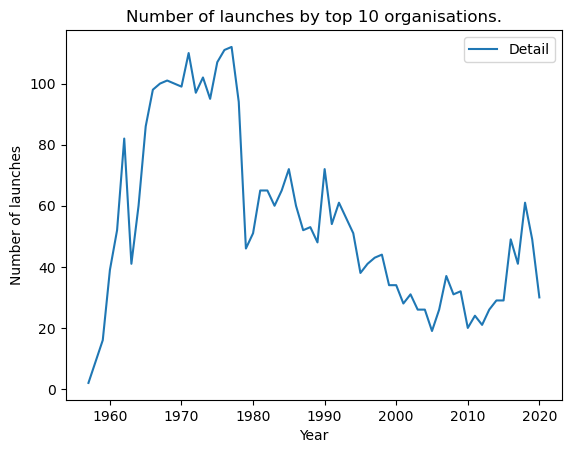

In [398]:
top_10_orgs_launches_per_years.plot(x="Year" , 
                                    y="Detail",                                  
                                    title = 'Number of launches by top 10 organisations.',
                                    ylabel = 'Number of launches')


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [338]:
df_data_cw = df_data[df_data['Year'] <= 1991]
df_data_cw

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,country,ISO
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,1991,China,CHN
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1991,Kazakhstan,KAZ
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,1991,Russian Federation,RUS
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,1991,France,FRA
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991,USA,USA
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,Kazakhstan,KAZ


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [339]:
df_data_cw['country'].replace(
    {
        'Russian Federation':'USSR',
        'Kazakhstan':'USSR'
    }, 
    inplace=True
)
df_data_cw = df_data_cw[df_data_cw['country'].isin(['USSR', 'USA'])]
df_data_cw.sample(10)

C:\Users\james\AppData\Local\Temp\ipykernel_21964\3486894434.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,country,ISO
3421,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1970-10-15 11:22:00+00:00,Vostok-2M | Meteor n†­17,StatusRetired,NaN,Success,1970,USSR,RUS
3636,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan",1968-09-14 21:42:00+00:00,Proton K/Block D | Zond-5,StatusRetired,NaN,Success,1968,USSR,KAZ
3024,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1974-06-29 15:59:00+00:00,Molniya-M /Block 2BL | Cosmos 665,StatusRetired,NaN,Success,1974,USSR,RUS
4143,General Dynamics,"LC-12, Cape Canaveral AFS, Florida, USA",1962-07-22 09:21:00+00:00,Atlas-LV3 Agena-B | Mariner 1,StatusRetired,NaN,Failure,1962,USA,USA
2115,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1985-08-27 10:58:00+00:00,Space Shuttle Discovery | STS-51-I,StatusRetired,450.0,Success,1985,USA,USA
2103,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1985-10-09 02:53:00+00:00,Atlas-E/F SGS-2 | GPS-11,StatusRetired,NaN,Success,1985,USA,USA
3499,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1969-12-27 14:20:00+00:00,Cosmos-3M (11K65M) | Ionosfernaya #1,StatusRetired,NaN,Failure,1969,USSR,RUS
4007,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1964-10-28 10:40:00+00:00,Vostok-2 | Cosmos 50,StatusRetired,NaN,Success,1964,USSR,KAZ
2573,General Dynamics,"SLC-36A, Cape Canaveral AFS, Florida, USA",1978-08-08 07:33:00+00:00,Atlas-SLV3D Centaur-D1AR | Pioneer Venus Multi...,StatusRetired,NaN,Success,1978,USA,USA
1818,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA",1990-06-12 05:52:00+00:00,Delta 4925-8 | INSAT 1D,StatusRetired,NaN,Success,1990,USA,USA


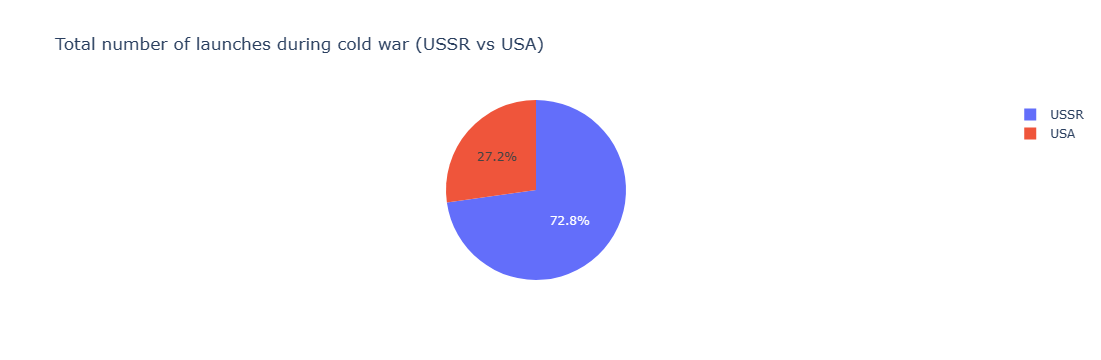

In [344]:
px.pie(
    title = 'Total number of launches during cold war (USSR vs USA)',
    values = df_data_cw['country'].value_counts(),
    names = df_data_cw['country'].value_counts().index,
)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [345]:
cold_war_launches_per_years = df_data_cw.groupby(['country', 'Year'], as_index=False).agg({'Detail': pd.Series.count})
cold_war_launches_per_years

,country,Year,Detail
0,USA,1957,1
1,USA,1958,23
2,USA,1959,16
3,USA,1960,30
4,USA,1961,43
...,...,...,...
65,USSR,1987,42
66,USSR,1988,36
67,USSR,1989,26
68,USSR,1990,37


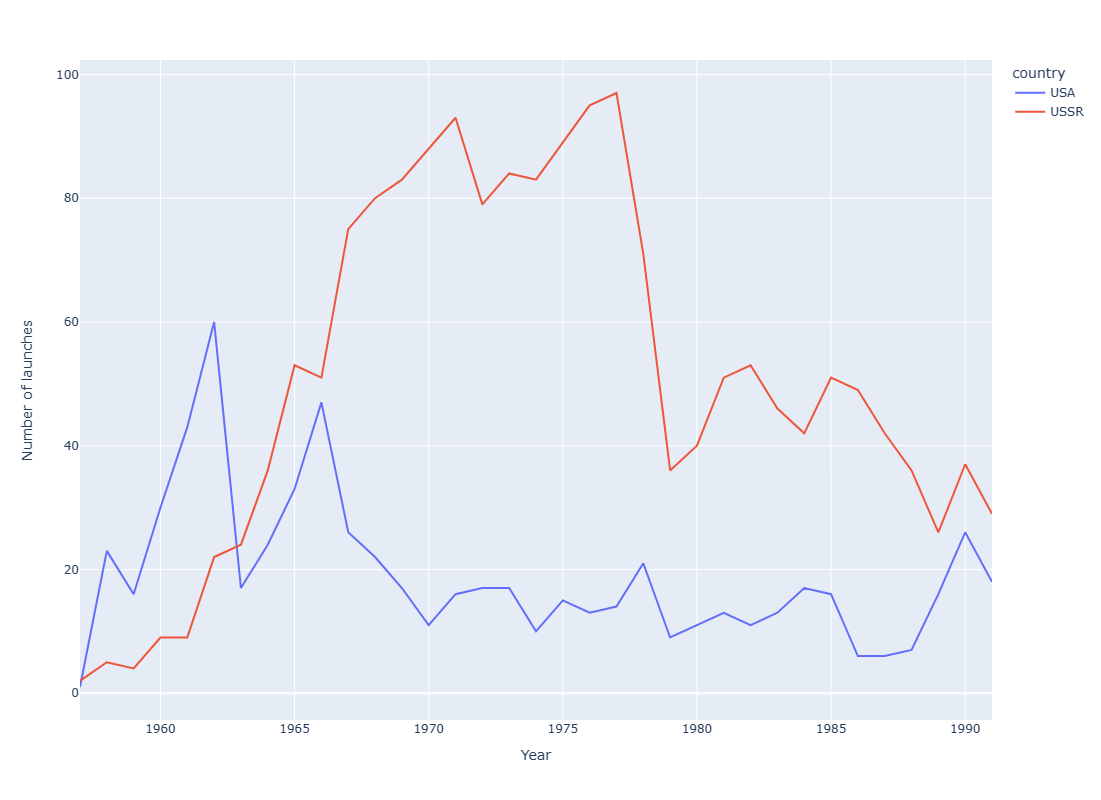

In [347]:
l_chart = px.line(cold_war_launches_per_years,
                  x='Year', 
                  y='Detail',
                  height=800,
                  color='country',
                  hover_name='country')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of launches')
 
l_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [355]:
cold_war_failed_launches_per_years = df_data_cw[df_data_cw['Mission_Status'] != 'Success'].groupby(['country', 'Year'], as_index=False).agg({'Detail': pd.Series.count})


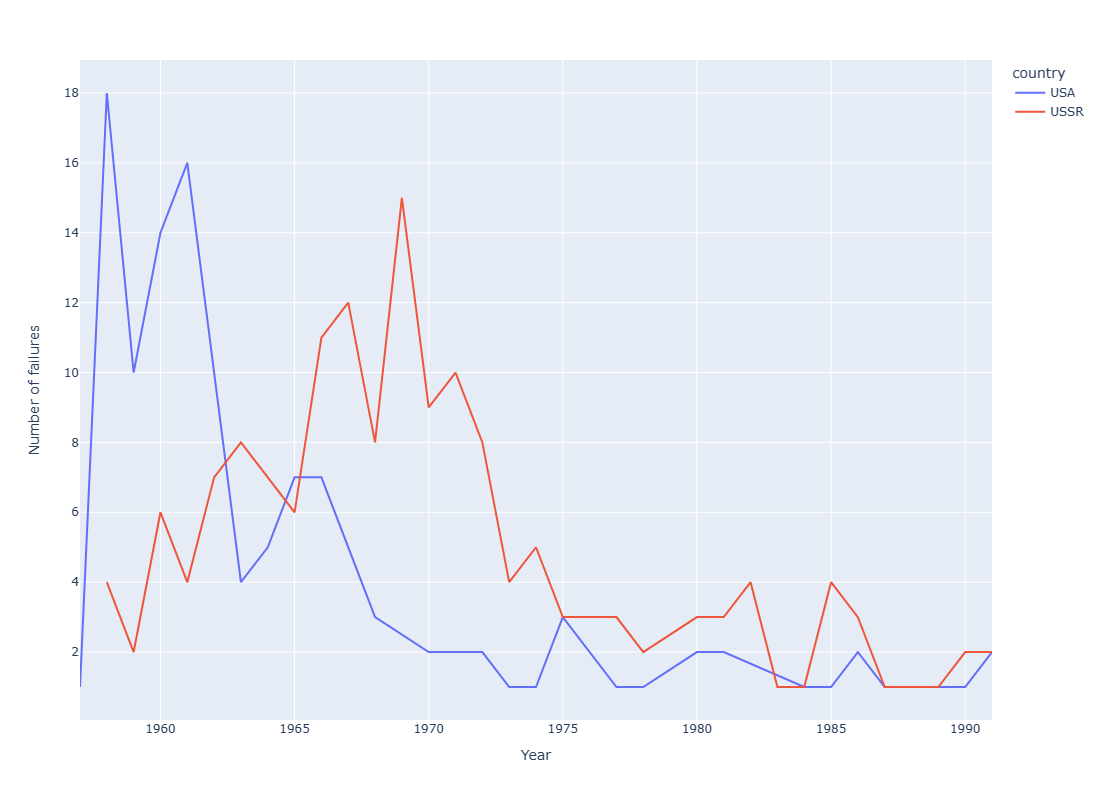

In [356]:
l_chart = px.line(cold_war_failed_launches_per_years,
                  x='Year', 
                  y='Detail',
                  height=800,
                  color='country',
                  hover_name='country')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of failures')
 
l_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [367]:
cw_launches_by_year = df_data_cw.groupby(['Year','country'])['Mission_Status'].count().unstack(level=1)
cw_launch_failures_by_year = df_data_cw[df_data_cw['Mission_Status']!='Success'].groupby(['Year', 'country'])['Mission_Status'].count().unstack(level=1)
cw_launch_failures_by_year.fillna(0, inplace=True)

cw_failure_pct_by_year = cw_launch_failures_by_year/cw_launches_by_year * 100
cw_failure_pct_by_year.fillna(0, inplace=True)
cw_failure_pct_by_year


country,USA,USSR
Year,,
1957,100.00,0.00
1958,78.26,80.00
1959,62.50,50.00
1960,46.67,66.67
1961,37.21,44.44
1962,16.67,31.82
1963,23.53,33.33
1964,20.83,19.44
1965,21.21,11.32


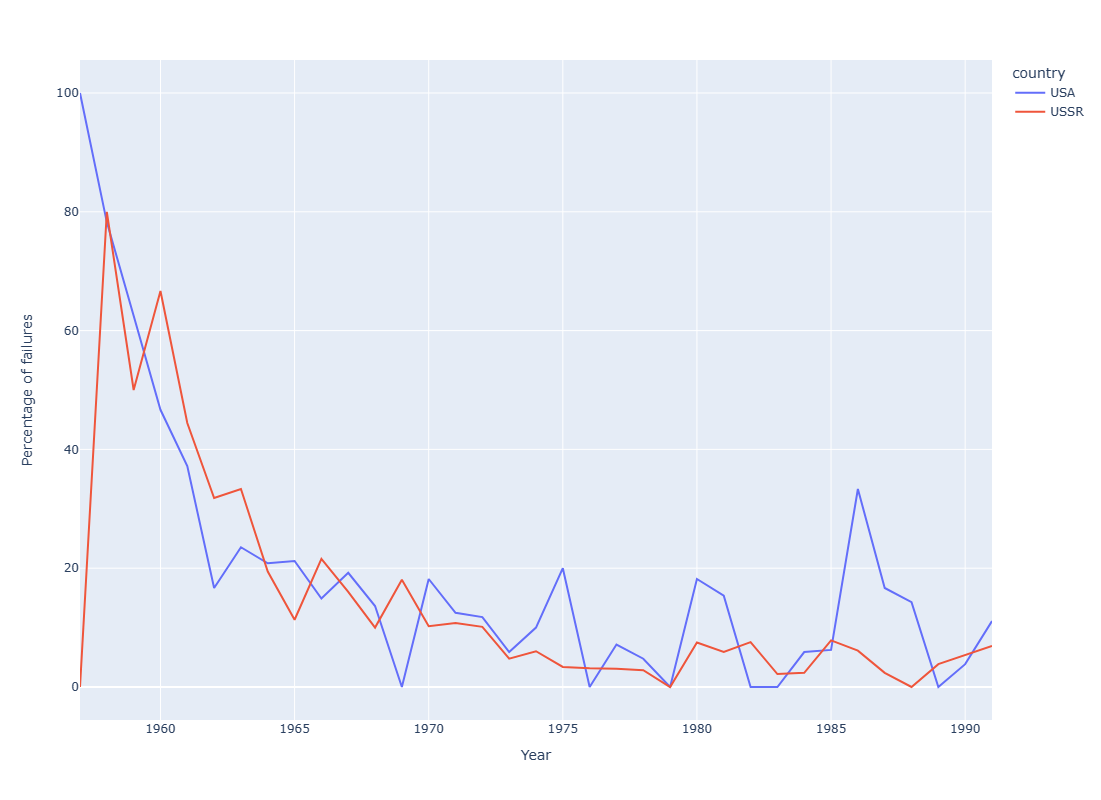

In [369]:
l_chart = px.line(cw_failure_pct_by_year,
                  height=800,
                  color='country',
                  hover_name='country')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Percentage of failures')
 
l_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [376]:
launches_by_country_per_years = df_data.groupby(['Year', 'country'])['Mission_Status'].count().unstack(level=1)
launches_by_country_per_years.fillna(0, inplace=True)
launches_by_country_per_years

country,Australia,Brazil,China,France,India,"Iran, Islamic Republic of",Israel,Japan,Kazakhstan,Kenya,Kiribati,"Korea, Democratic People's Republic of","Korea, Republic of",New Zealand,Russian Federation,USA
Year,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1958,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,22.00,11.00,7.00,0.00,1.00,4.00,11.00,0.00,0.00,1.00,0.00,0.00,6.00,27.00
2017,0.00,0.00,18.00,11.00,5.00,1.00,0.00,7.00,13.00,0.00,0.00,0.00,0.00,1.00,6.00,30.00
2018,0.00,0.00,39.00,11.00,7.00,0.00,0.00,6.00,9.00,0.00,0.00,0.00,0.00,3.00,8.00,34.00


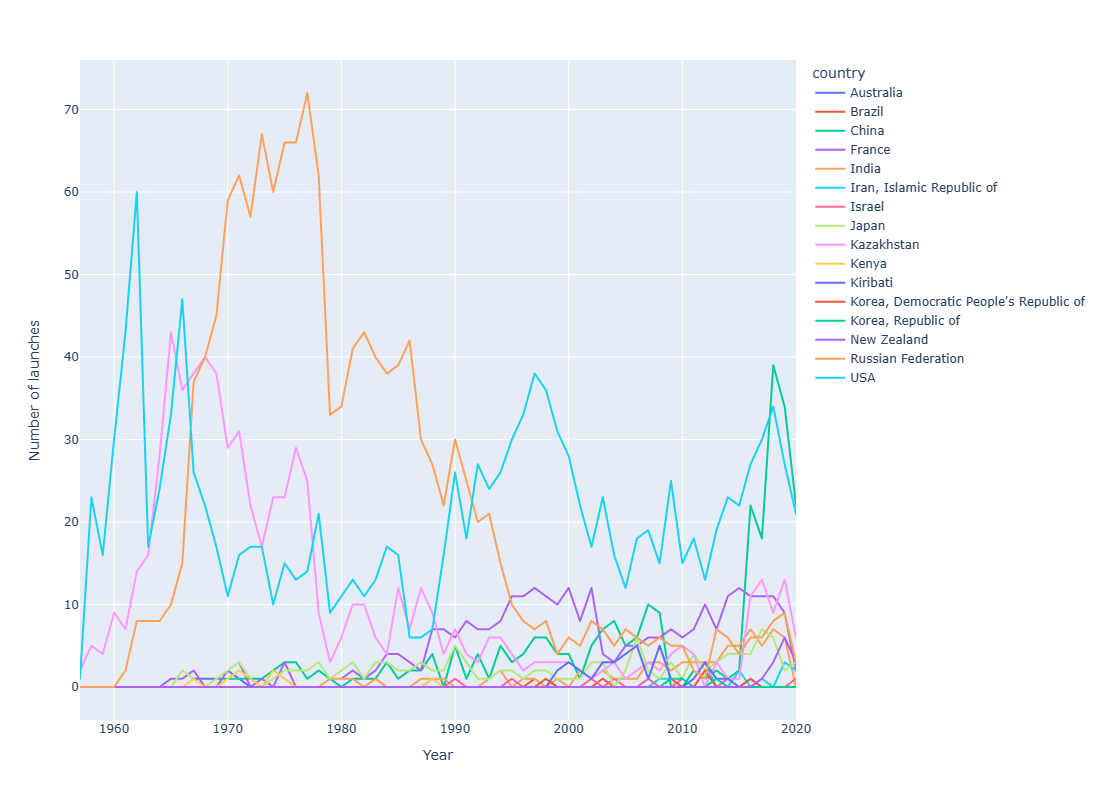

In [377]:
l_chart = px.line(launches_by_country_per_years,
                  height=800,
                  color='country',
                  hover_name='country')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of launches')
 
l_chart.show()

In [381]:
successful_launches_by_country_per_years = df_data[df_data['Mission_Status'] == 'Success'].groupby(['Year', 'country'])['Mission_Status'].count().unstack(level=1)
successful_launches_by_country_per_years.fillna(0, inplace=True)
successful_launches_by_country_per_years

country,Australia,China,France,India,"Iran, Islamic Republic of",Israel,Japan,Kazakhstan,Kenya,Kiribati,"Korea, Democratic People's Republic of","Korea, Republic of",New Zealand,Russian Federation,USA
Year,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1958,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,20.00,11.00,7.00,0.00,1.00,4.00,10.00,0.00,0.00,1.00,0.00,0.00,6.00,26.00
2017,0.00,16.00,11.00,4.00,0.00,0.00,6.00,12.00,0.00,0.00,0.00,0.00,0.00,5.00,30.00
2018,0.00,38.00,10.00,7.00,0.00,0.00,6.00,8.00,0.00,0.00,0.00,0.00,3.00,8.00,33.00


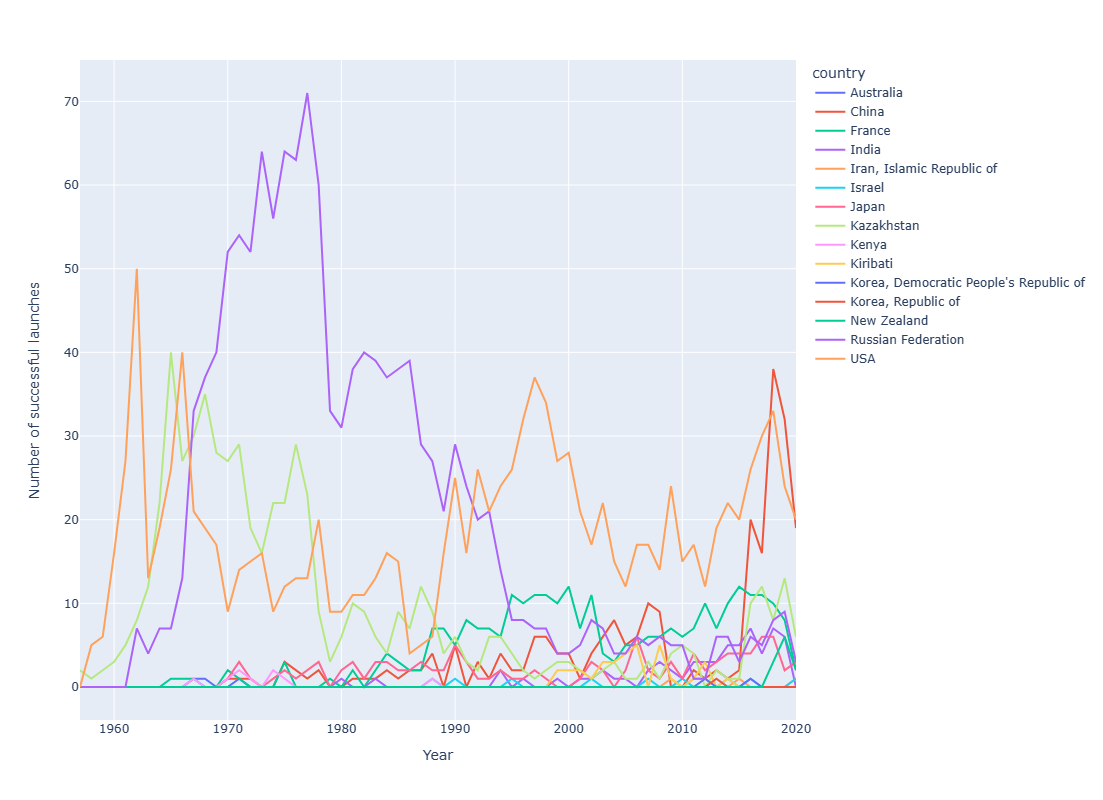

In [382]:
l_chart = px.line(successful_launches_by_country_per_years,
                  height=800,
                  color='country',
                  hover_name='country')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of successful launches')
 
l_chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [383]:
org_counts = df_data.groupby("Organisation").size().reset_index(name="Count")
org_counts = org_counts.sort_values("Count", ascending=False)
top_10_orgs = org_counts.head(10)
top_10_orgs_df = df_data[df_data["Organisation"].isin(top_10_orgs["Organisation"])]
organization_launches_per_years = top_10_orgs_df.groupby(['Organisation', 'Year'], as_index=False).agg({'Detail': pd.Series.count})
organization_launches_per_years

,Organisation,Year,Detail
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6
...,...,...,...
318,VKS RF,2016,4
319,VKS RF,2017,6
320,VKS RF,2018,5
321,VKS RF,2019,8


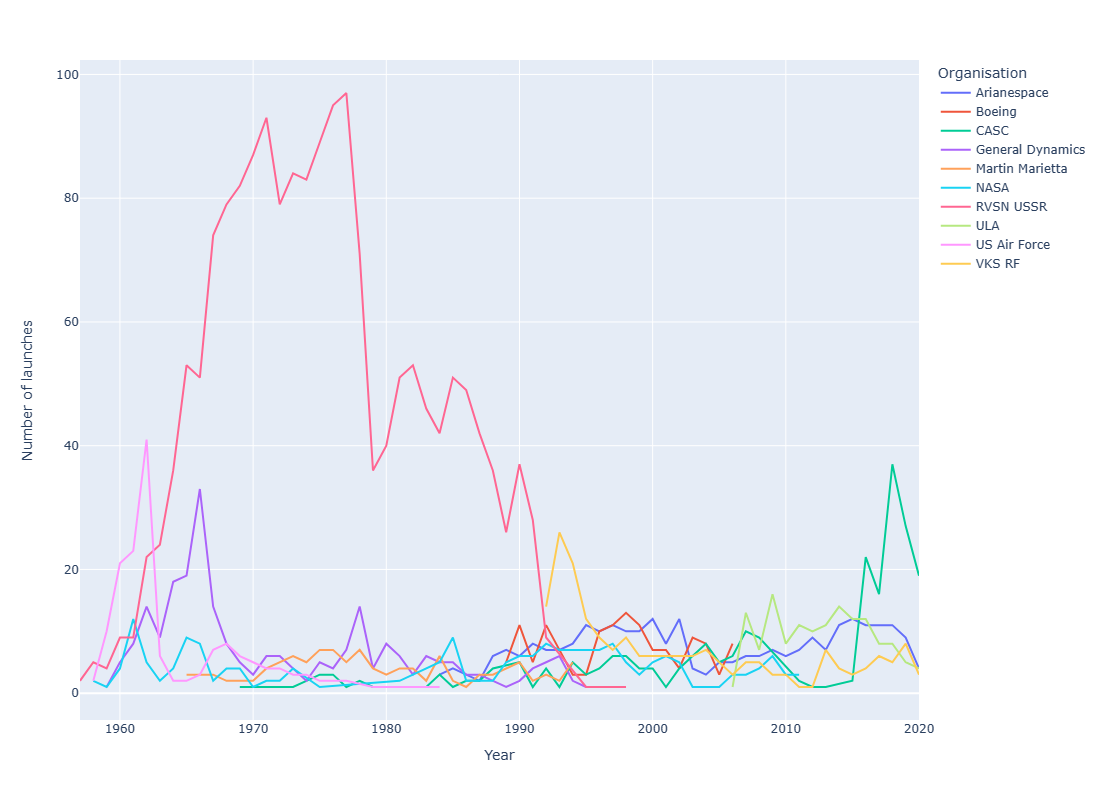

In [384]:
l_chart = px.line(organization_launches_per_years,
                  x='Year', 
                  y='Detail',
                  height=800,
                  color='Organisation',
                  hover_name='Organisation')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of launches')
 
l_chart.show()